<a href="https://colab.research.google.com/github/Mohammad-Kaosain-Akbar/Employee-Incentive-Prediction-using-Regression-Models/blob/main/Finding_productivity_for_Garments_employee_using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [717]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import Dense

from IPython.display import Image, display

In [718]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Link for the dataset and its description: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees

> *Checking if there are any null values in the dataset*

In [719]:
df.isnull().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

In [720]:
# Finding number of rows that has null values 
df.isnull().values.ravel().sum()

# for i in range(len(df.index)) :
#     print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())

506

> *There are 506 null values in the "WIP" columns of the dataset. Now We have to check whether these NULL values of WIP have any connection with any other features of the dataset.*

In [721]:
df[df.isna().any(axis=1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


*Since NULL is mostly seen in the Finishing department of the dataset, instead of filling the null using mean, median, forward fill and backward fill, we should consider putting the values to 0*

In [722]:
df.fillna(0, inplace = True)
df.isnull().values.ravel().sum()  # We can see that now whether there are any null values or not

0

In [723]:
print(df['department'].unique())

['sweing' 'finishing ' 'finishing']


In [724]:
cat = {"department":     {"sweing":"sweing", "finishing": "finishing", "finishing ": "finishing"}}
df = df.replace(cat)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


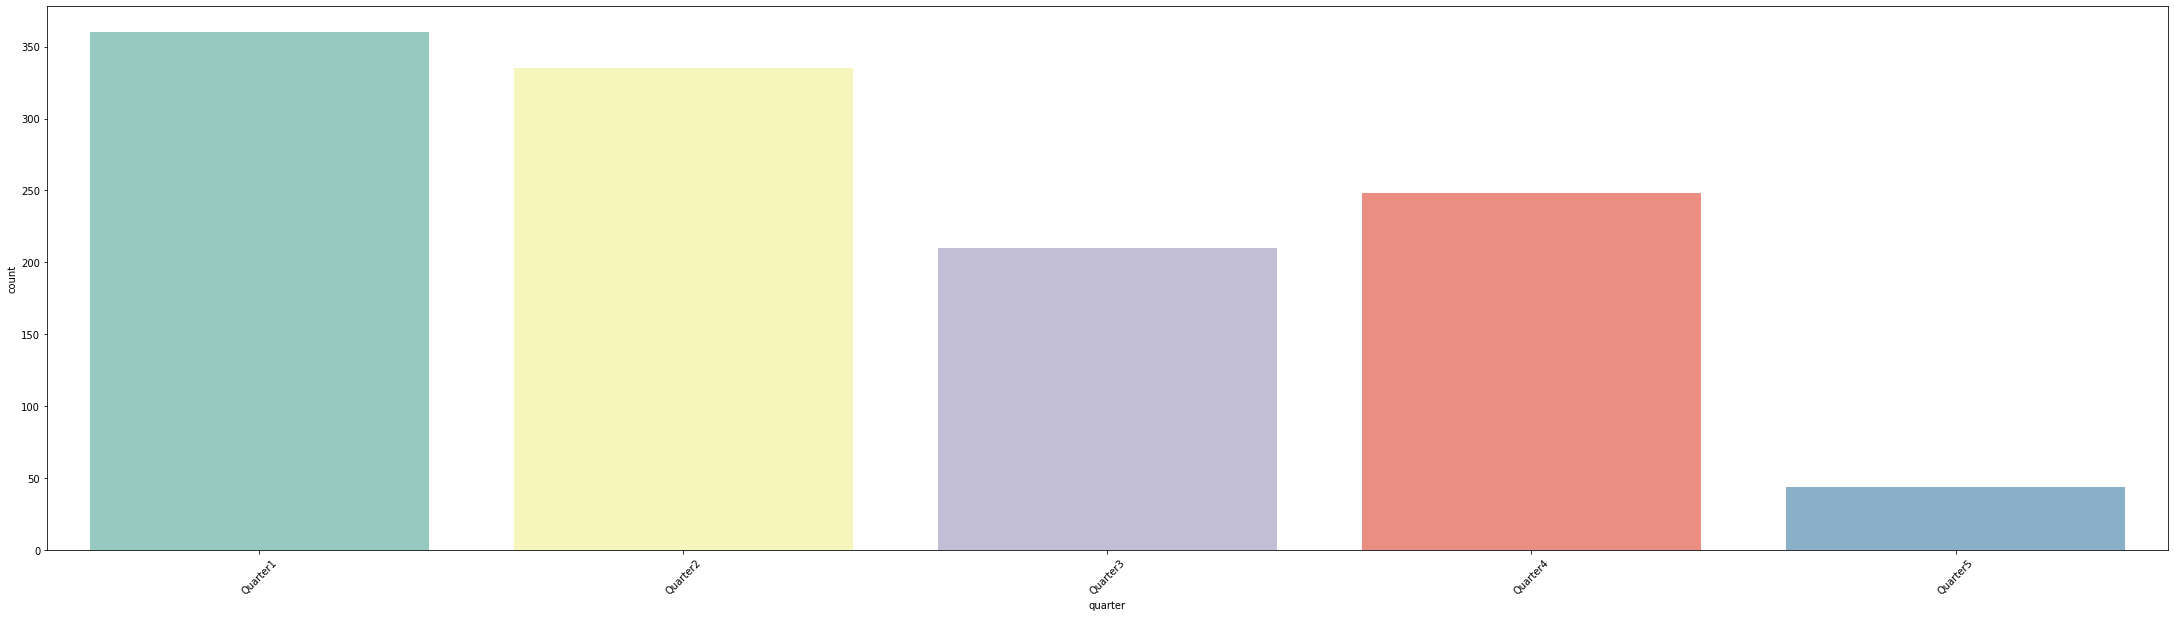

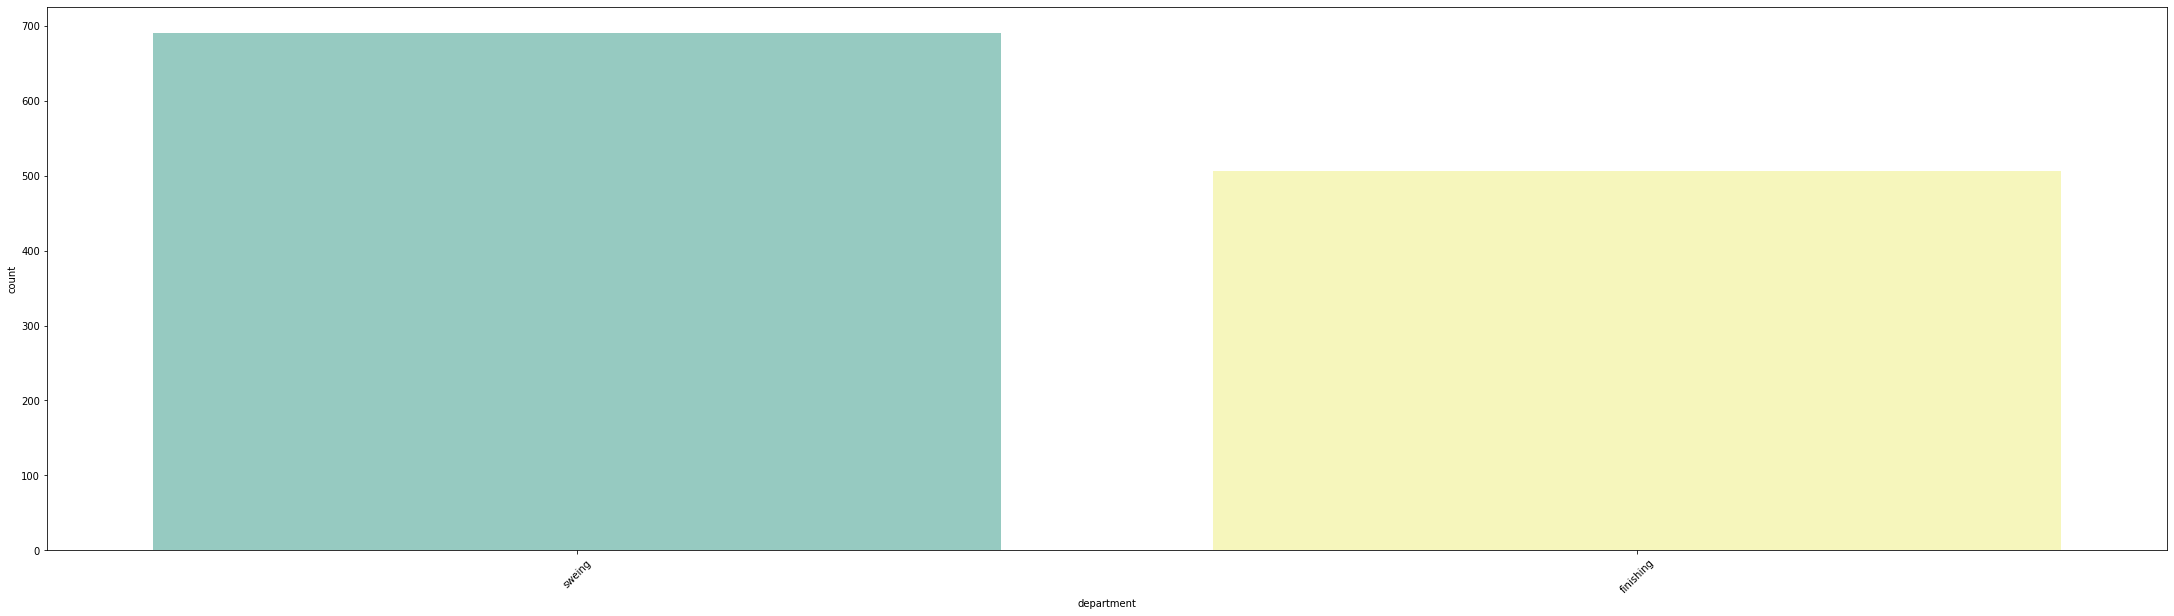

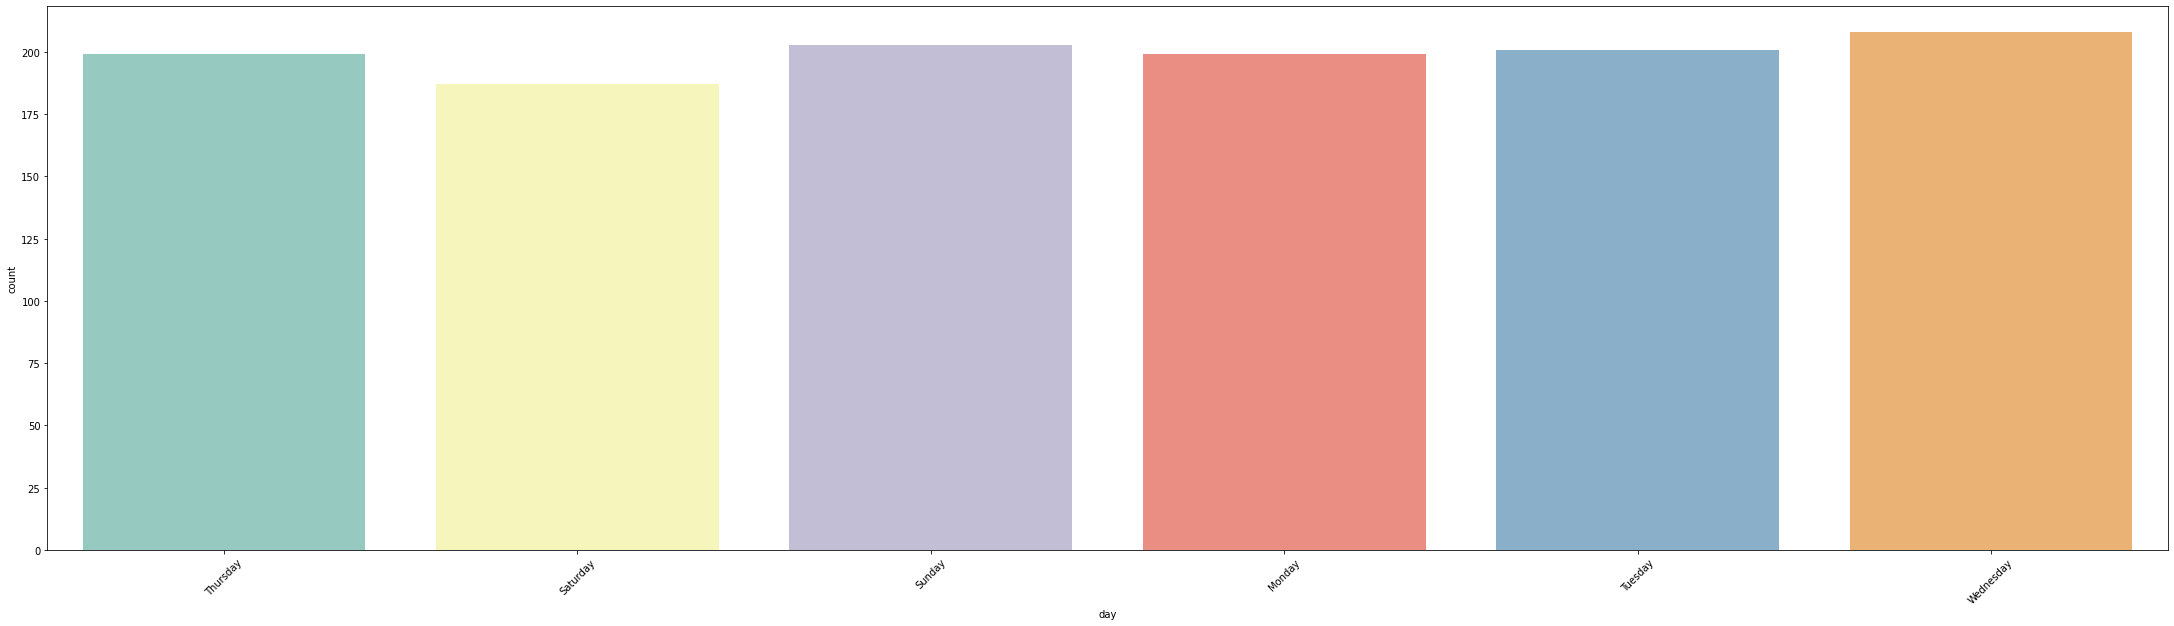

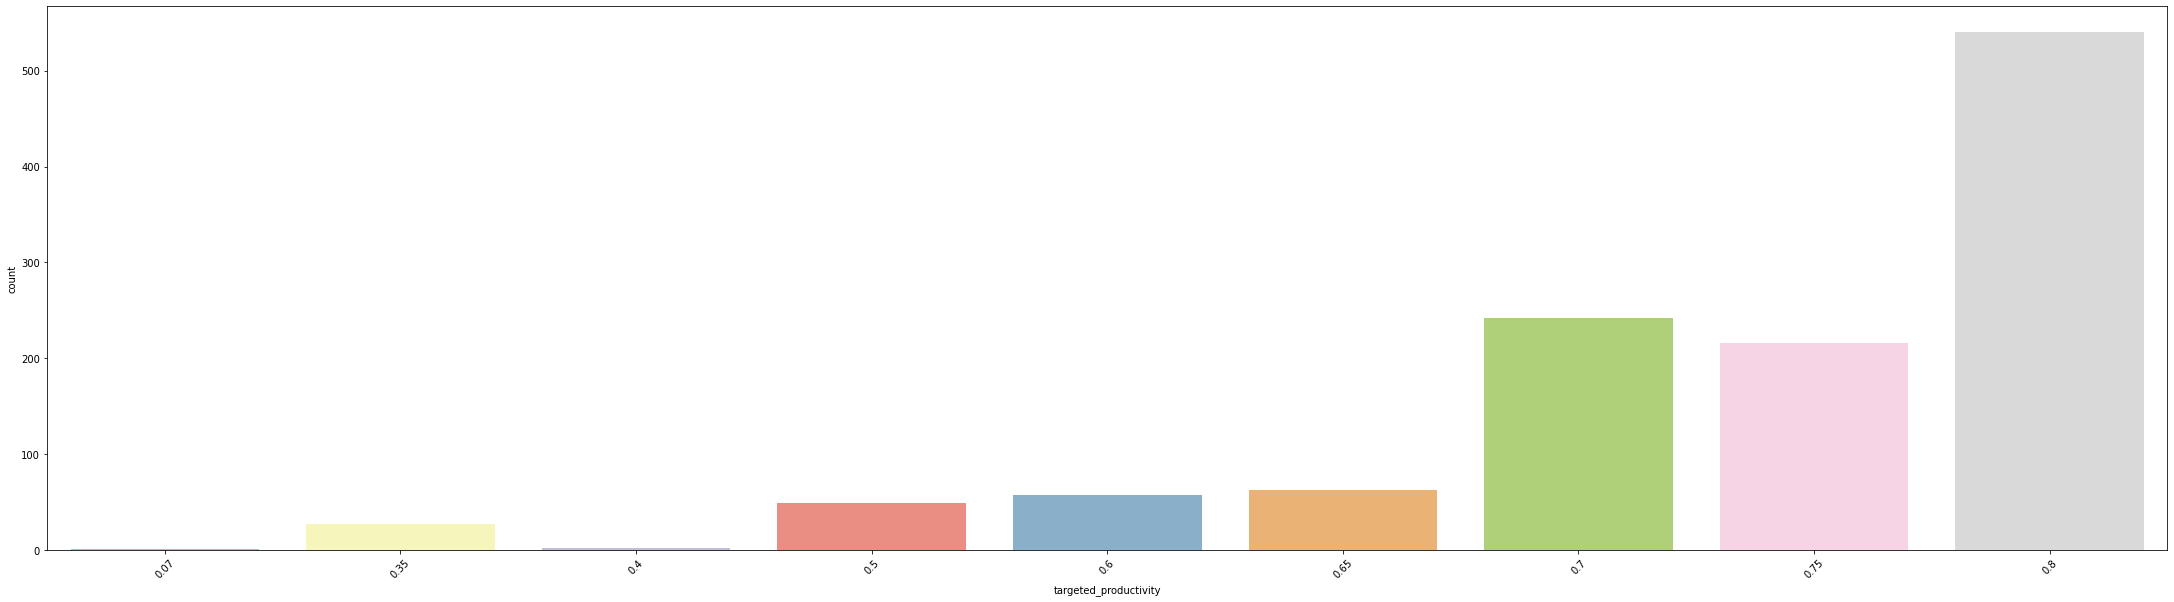

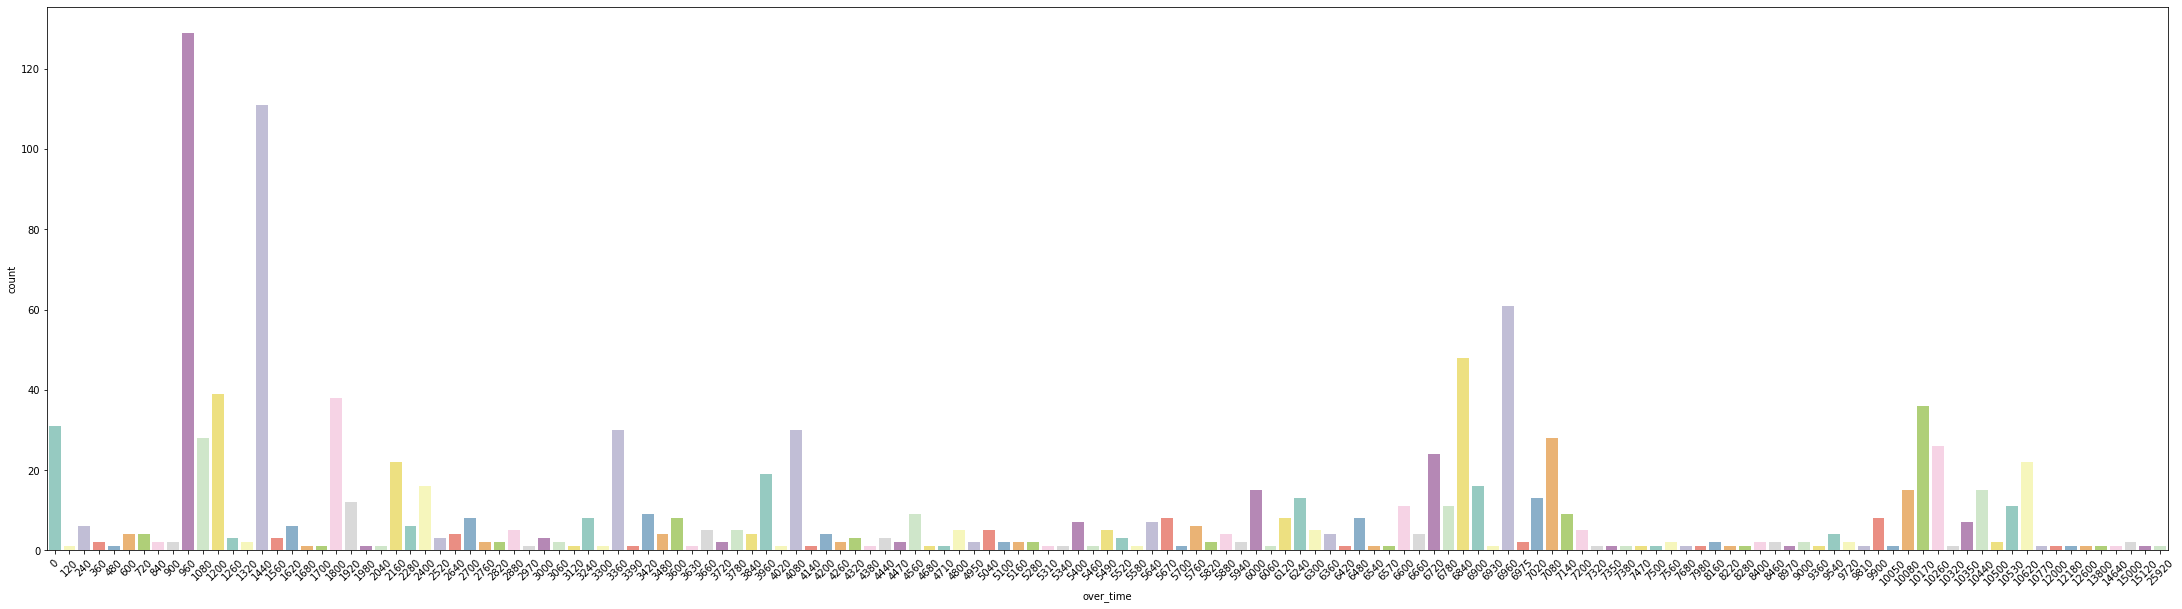

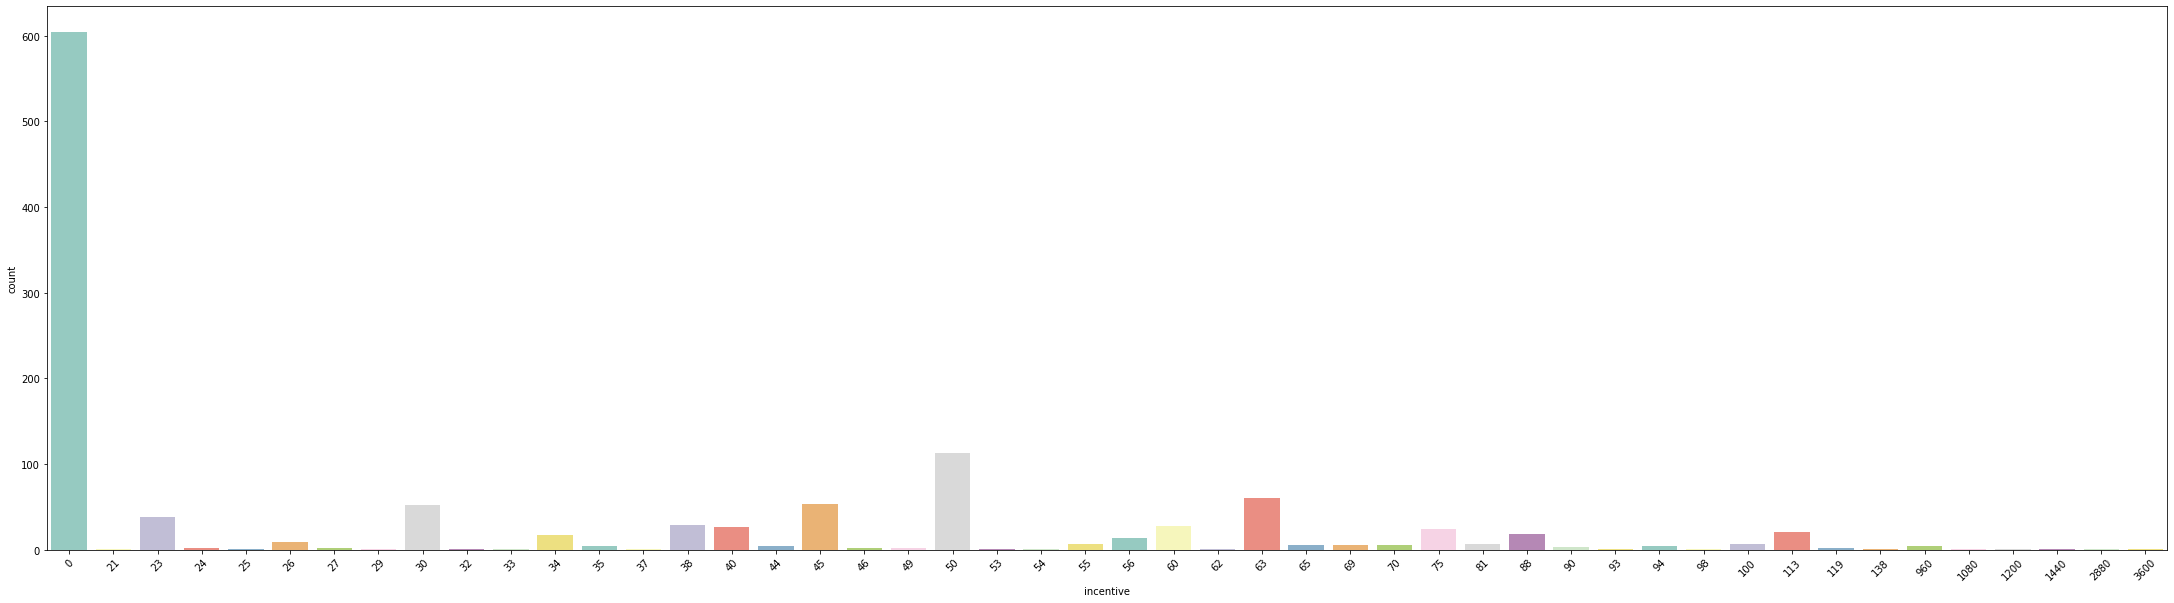

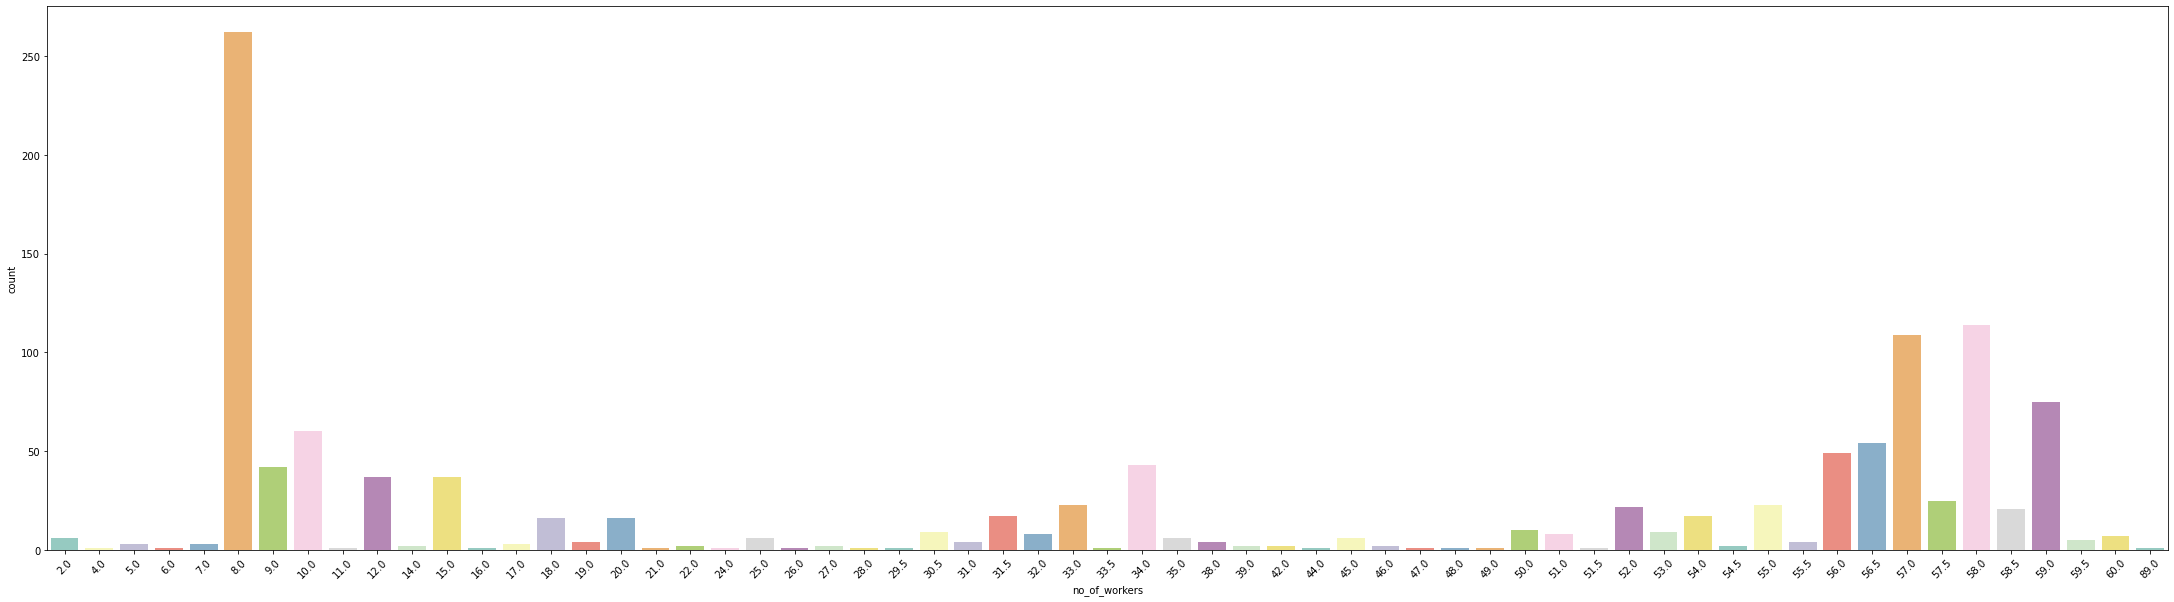

In [725]:
features = [ 'quarter','department','day', 'targeted_productivity', 'over_time', 'incentive', 'no_of_workers']
# fig = plt.figure(figsize=(8, 6))
for f in features:
    fig = plt.figure(figsize=(38, 10))
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [726]:
print(df['department'].unique())
print(df['quarter'].unique())
print(df['day'].unique())

['sweing' 'finishing']
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [727]:
cat = {"department":     {"sweing":1, "finishing": 2, "finishing ": 2},  #*

       "quarter":  {'Quarter1':1, 'Quarter2':2, 'Quarter3': 3, 'Quarter4':4, 'Quarter5': 5 },

       "day":  {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Saturday': 5} 
                                  }
df = df.replace(cat)

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,2,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,2,2,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,2,2,2,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,2,2,2,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,2,2,2,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [728]:
df['date']= pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.drop("date", axis=1, inplace=True)
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,1,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,1,2,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,1,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,1,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,1,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,2,11,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,3,2015
1193,2,2,11,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,3,2015
1194,2,2,11,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,3,2015
1195,2,2,11,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,3,2015


In [729]:
df = df[["day", "month", "year", "quarter", "department", "team", "targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time", "no_of_style_change", "no_of_workers", "actual_productivity"]]
df

,day,month,year,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,no_of_style_change,no_of_workers,actual_productivity
0,1,1,2015,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725
1,1,1,2015,1,2,1,0.75,3.94,0.0,960,0,0.0,0,8.0,0.886500
2,1,1,2015,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570
3,1,1,2015,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570
4,1,1,2015,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,11,3,2015,2,2,10,0.75,2.90,0.0,960,0,0.0,0,8.0,0.628333
1193,11,3,2015,2,2,8,0.70,3.90,0.0,960,0,0.0,0,8.0,0.625625
1194,11,3,2015,2,2,7,0.65,3.90,0.0,960,0,0.0,0,8.0,0.625625
1195,11,3,2015,2,2,9,0.75,2.90,0.0,1800,0,0.0,0,15.0,0.505889


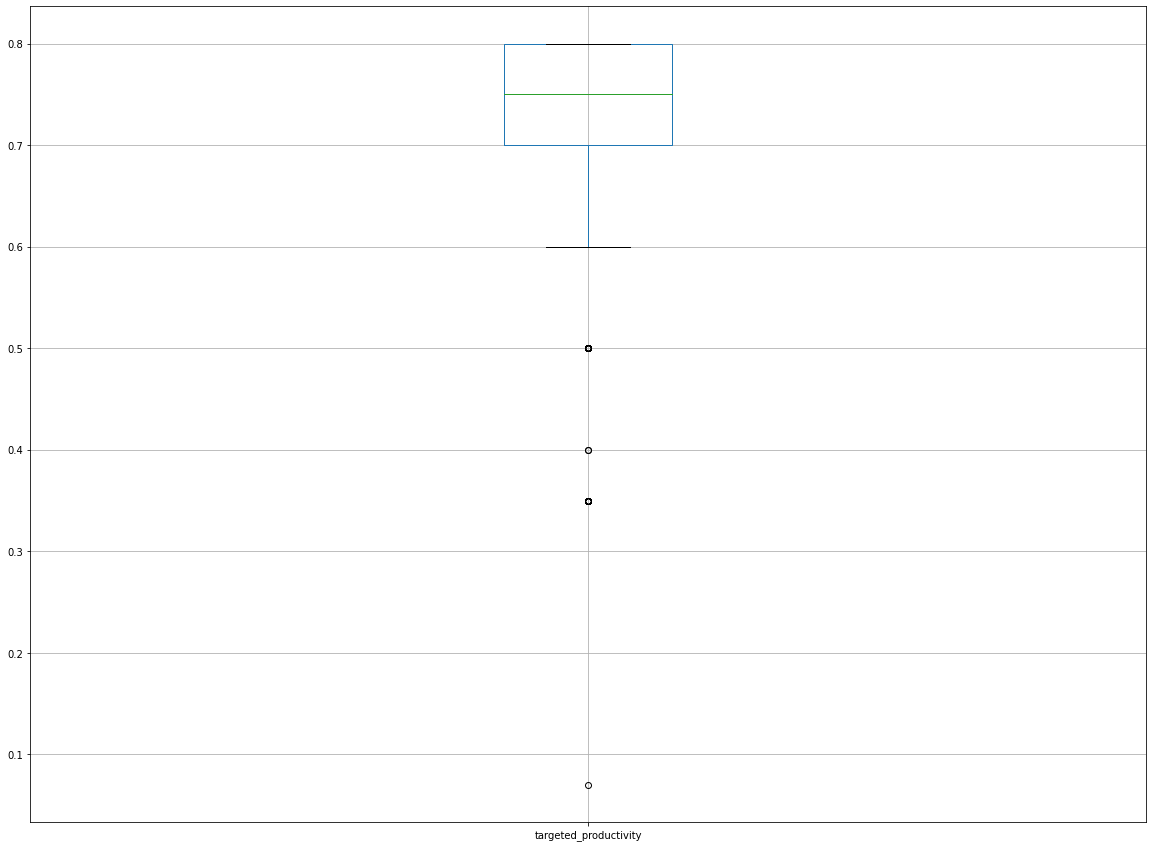

In [730]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
boxplot = df.boxplot(column="targeted_productivity")

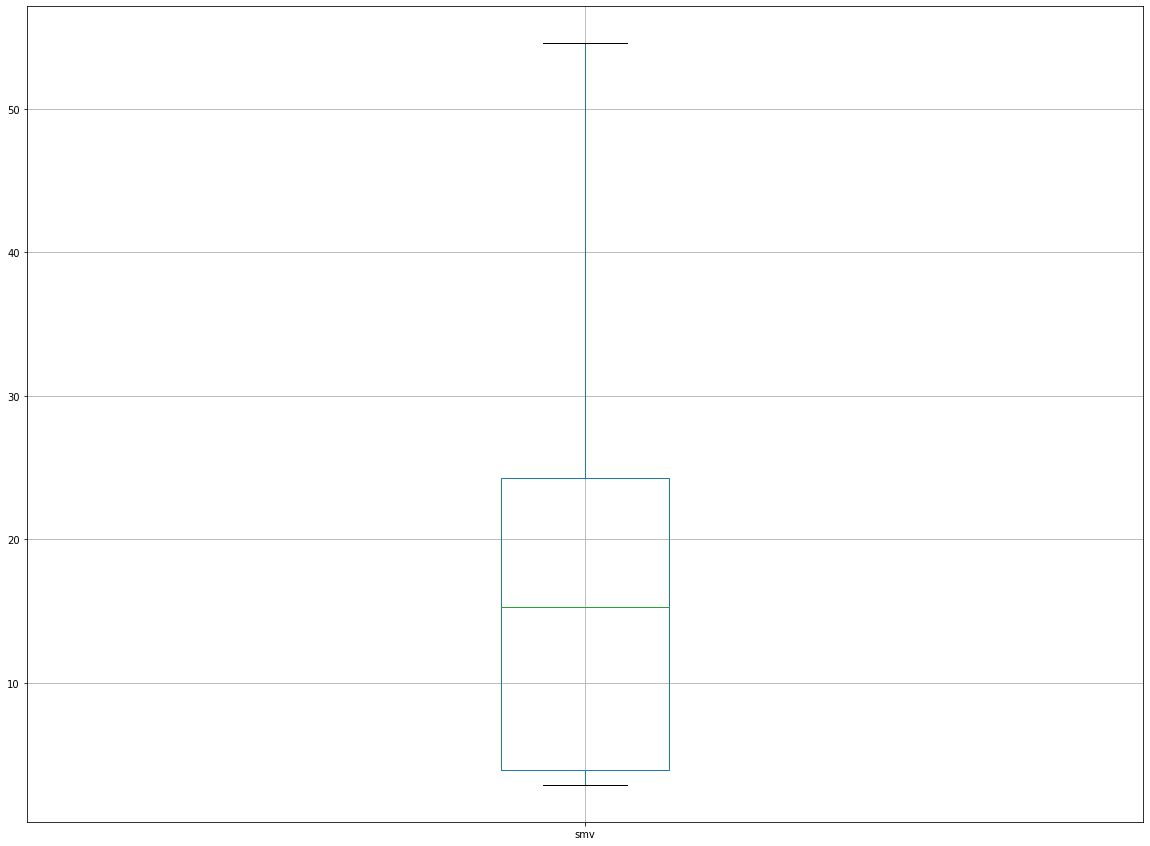

In [731]:
boxplot = df.boxplot(column="smv")

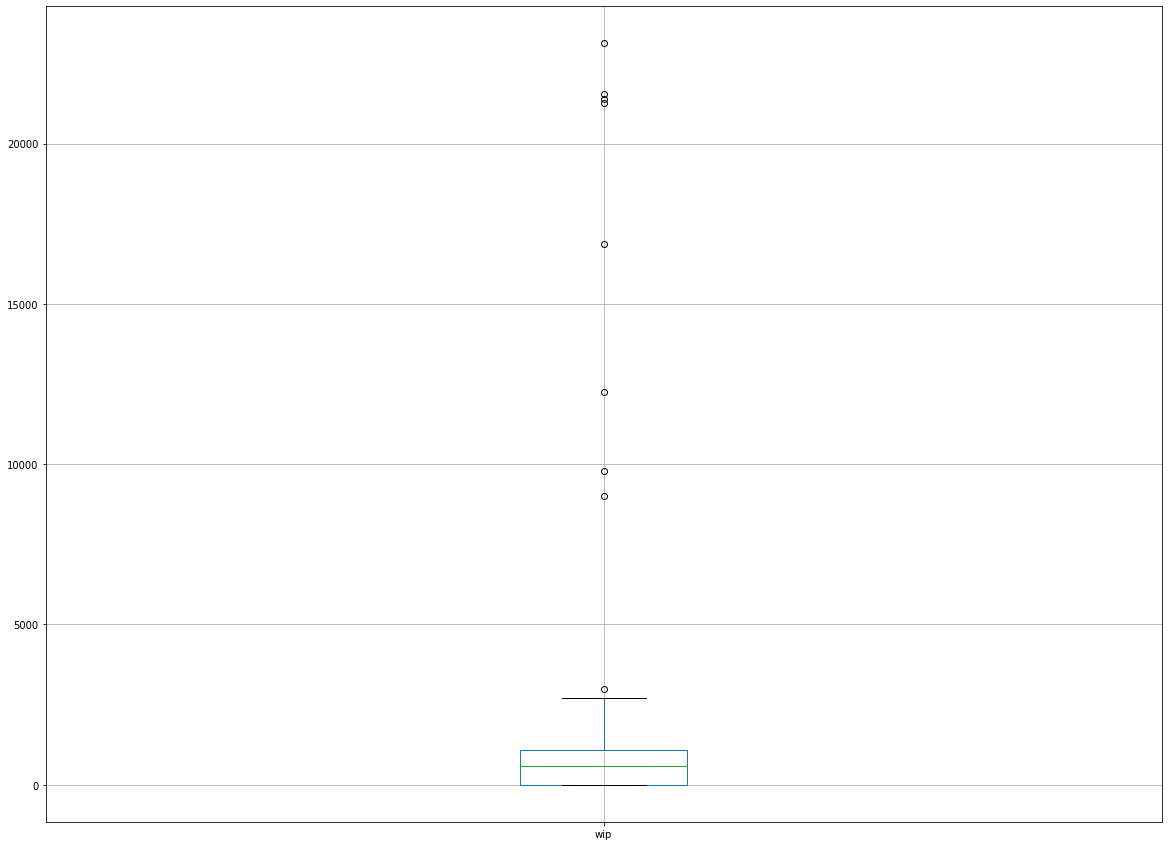

In [732]:
boxplot = df.boxplot(column="wip")

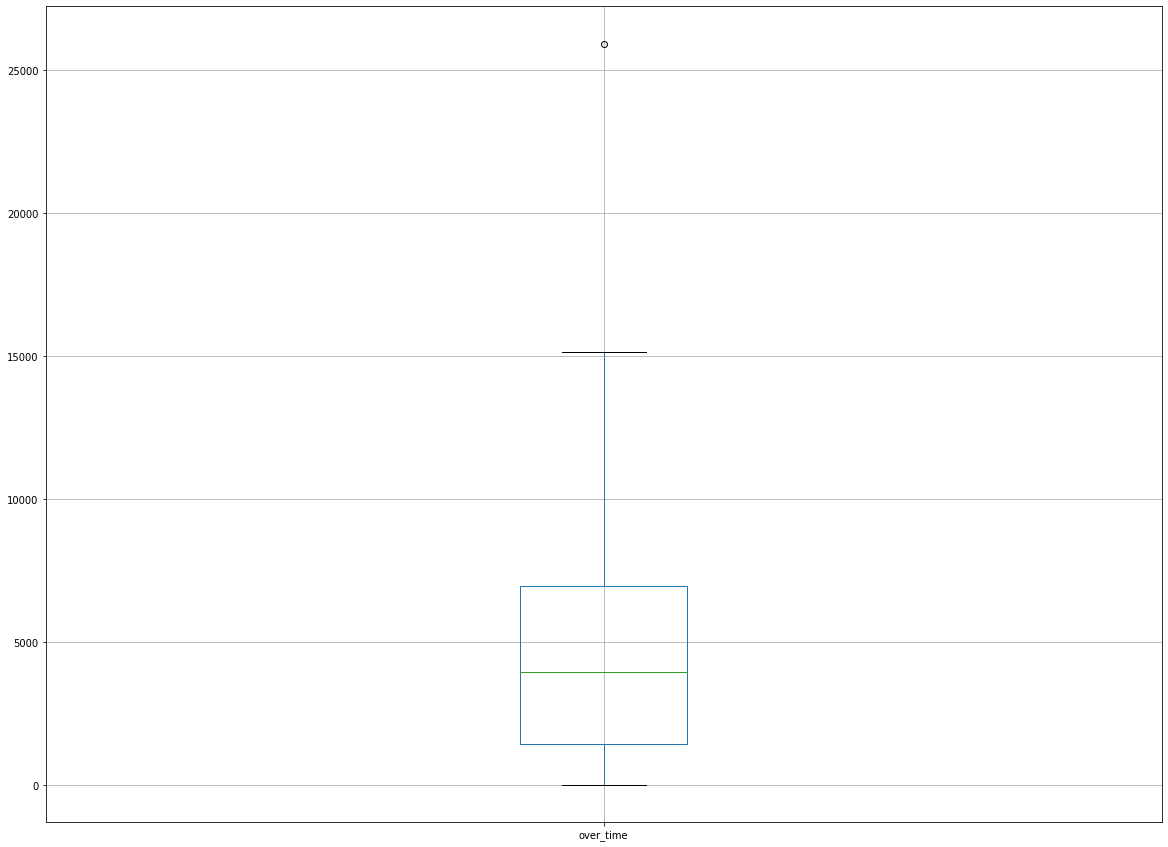

In [733]:
boxplot = df.boxplot(column="over_time")

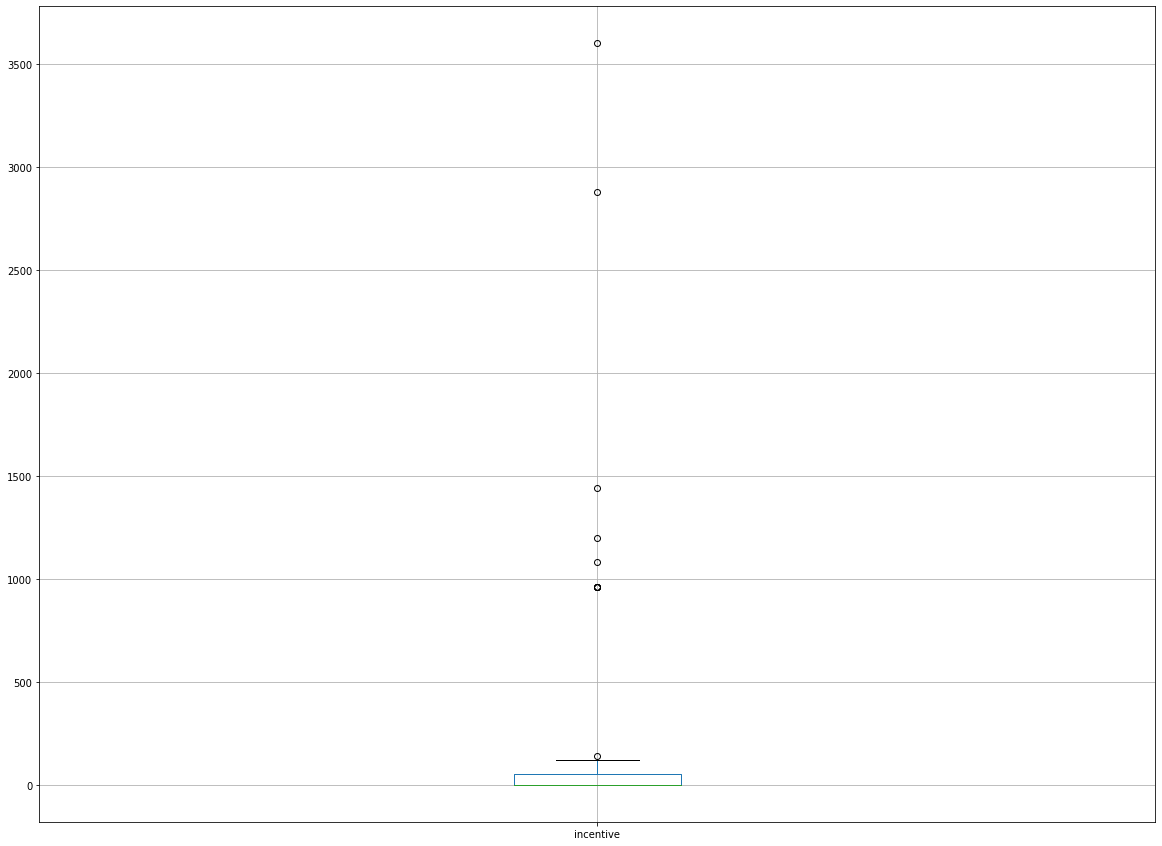

In [734]:
boxplot = df.boxplot(column="incentive")

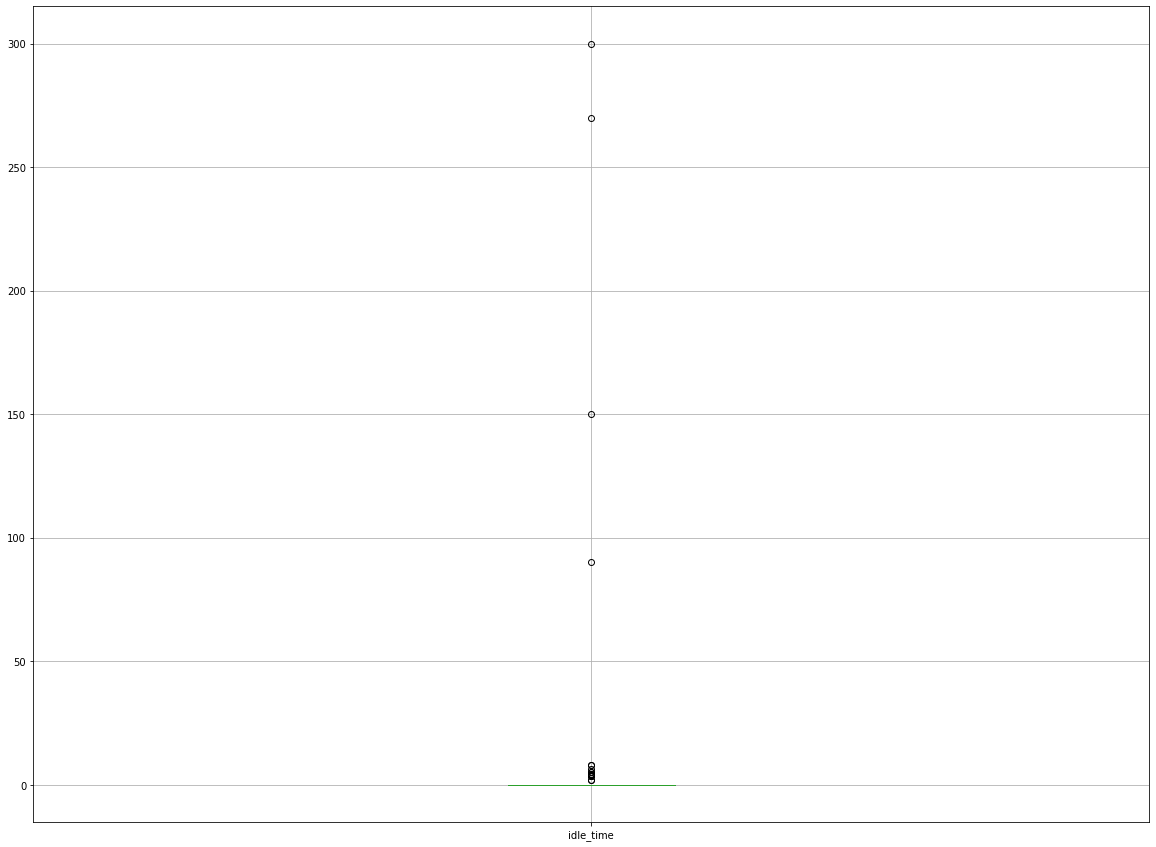

In [735]:
boxplot = df.boxplot(column="idle_time")

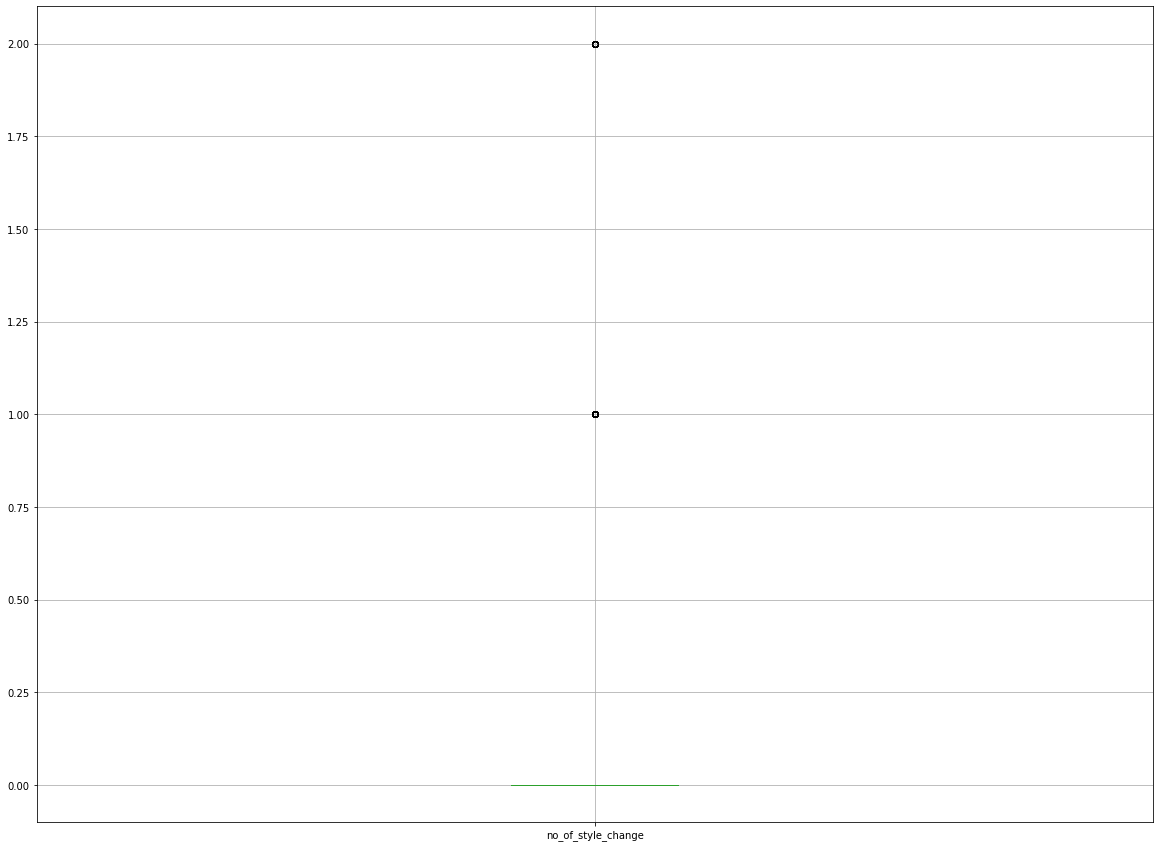

In [736]:
boxplot = df.boxplot(column="no_of_style_change")

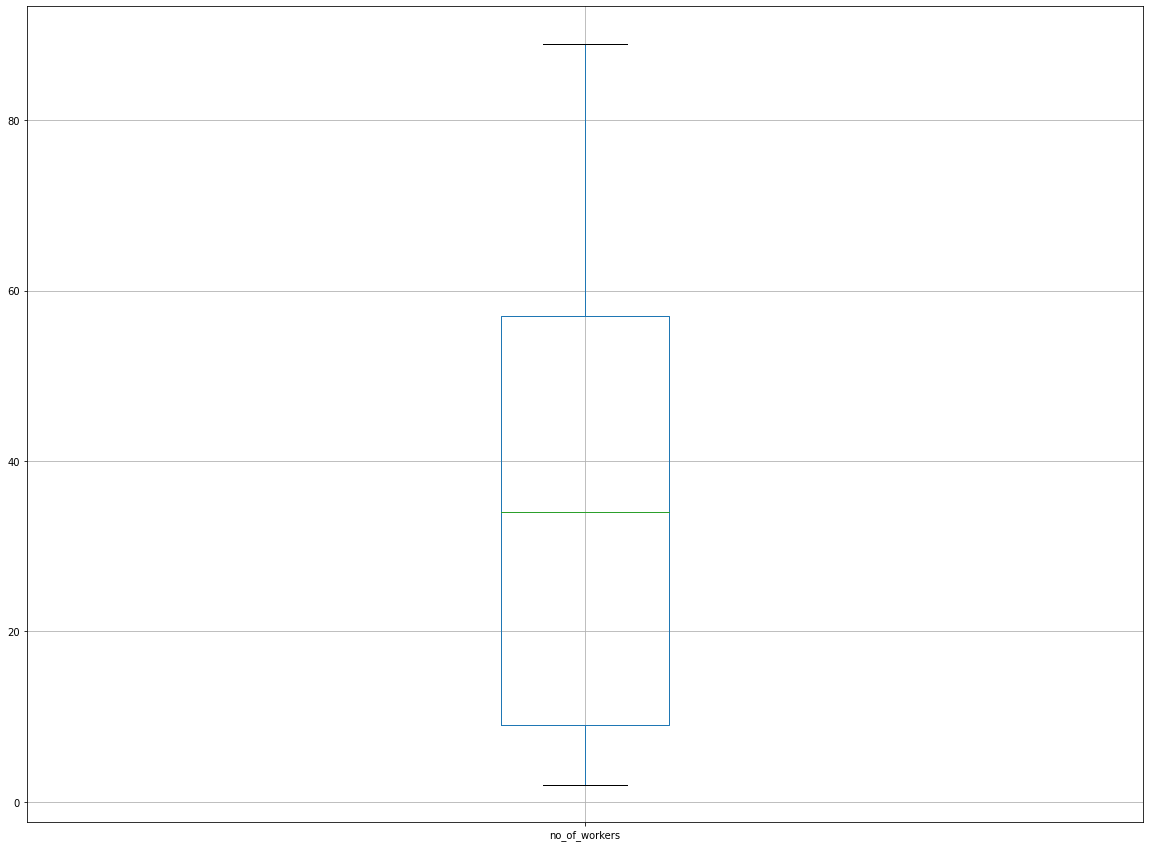

In [737]:
boxplot = df.boxplot(column="no_of_workers")

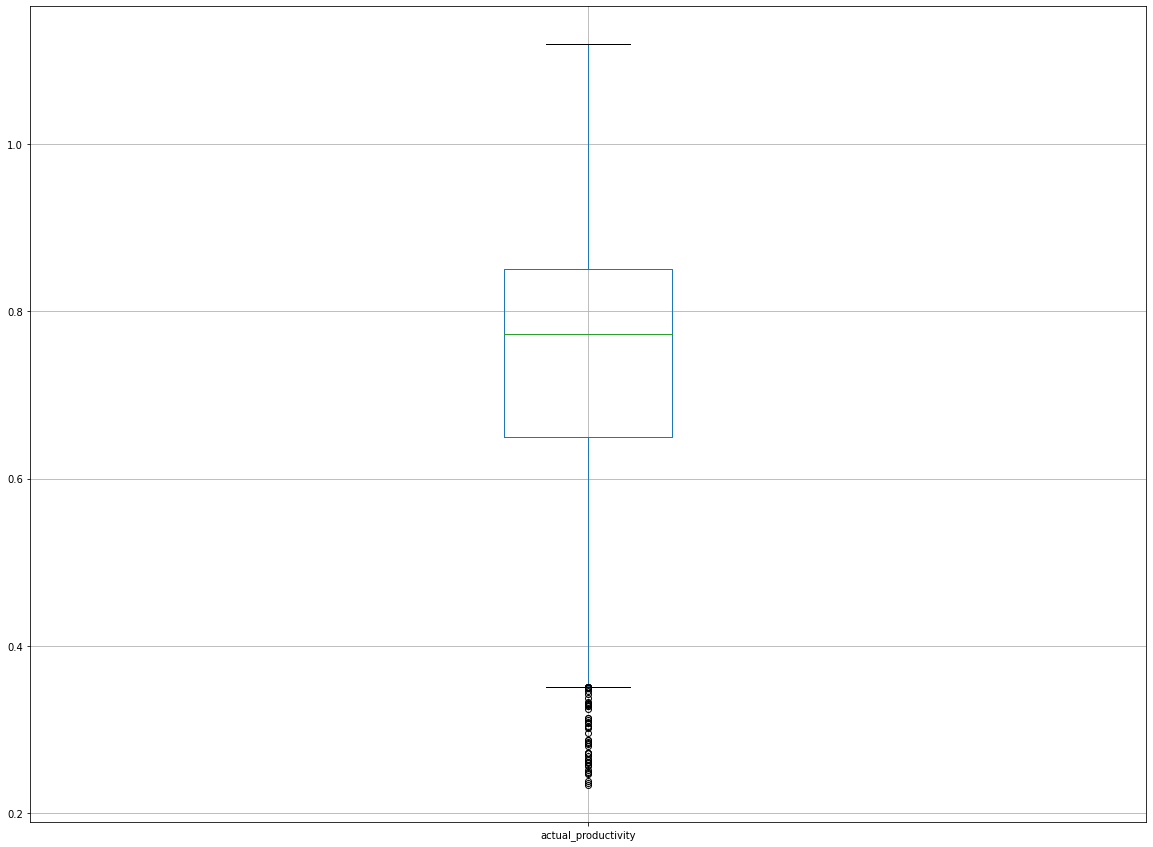

In [738]:
boxplot = df.boxplot(column="actual_productivity")


In [739]:
# Removing the outliers

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [740]:
x = df.iloc[:,0:14] 
x

,day,month,year,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,no_of_style_change,no_of_workers
0,1,1,2015,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,59.0
1,1,1,2015,1,2,1,0.75,3.94,0.0,960,0,0.0,0,8.0
2,1,1,2015,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,30.5
3,1,1,2015,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,30.5
4,1,1,2015,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,11,3,2015,2,2,10,0.75,2.90,0.0,960,0,0.0,0,8.0
1193,11,3,2015,2,2,8,0.70,3.90,0.0,960,0,0.0,0,8.0
1194,11,3,2015,2,2,7,0.65,3.90,0.0,960,0,0.0,0,8.0
1195,11,3,2015,2,2,9,0.75,2.90,0.0,1800,0,0.0,0,15.0


In [741]:
y = df.iloc[:,14:15] 
y

,actual_productivity
0,0.940725
1,0.886500
2,0.800570
3,0.800570
4,0.800382
...,...
1192,0.628333
1193,0.625625
1194,0.625625
1195,0.505889


In [742]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

In [743]:
from sklearn.multioutput import MultiOutputRegressor

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()

from sklearn.neighbors import KNeighborsRegressor
model2 = MultiOutputRegressor(KNeighborsRegressor())

from lightgbm import LGBMRegressor
model3 = MultiOutputRegressor(LGBMRegressor())

from sklearn import linear_model
model4 = MultiOutputRegressor(linear_model.Lasso(alpha=0.1))

from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

from sklearn.linear_model import SGDRegressor
model6 = MultiOutputRegressor(SGDRegressor())

from sklearn.neural_network import MLPRegressor
model7 = MultiOutputRegressor(MLPRegressor(random_state=1, max_iter=500))

In [744]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from numpy import mean
from numpy import std
from numpy import absolute

cv = KFold(n_splits=5, random_state=None, shuffle=False)

scores1 = cross_val_score(model1, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean MAE score of the Decision Tree Regression: %.3f ' % (mean(scores1)))

scores2 = cross_val_score(model2, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean MAE score of the K Neighbor Regressor: %.3f ' % (mean(scores2)))

scores3 = cross_val_score(model3, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean MAE score of the LGBM Regression: %.3f ' % (mean(scores3)))

scores4 = cross_val_score(model4, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores4 = absolute(scores4)
print('Mean MAE score of the Lasso Regression: %.3f ' % (mean(scores4)))

scores5 = cross_val_score(model5, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores5 = absolute(scores5)
print('Mean MAE score of the Linear Regression: %.3f ' % (mean(scores5)))

scores6 = cross_val_score(model6, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores6 = absolute(scores6)
print('Mean MAE score of the SGD Regression: %.3f ' % (mean(scores6)))

scores7 = cross_val_score(model7, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores7 = absolute(scores7)
print('Mean MAE score of the MLP Regression: %.3f ' % (mean(scores7)))

Mean MAE score of the Decision Tree Regression: 0.110 
Mean MAE score of the K Neighbor Regressor: 0.120 
Mean MAE score of the LGBM Regression: 0.090 
Mean MAE score of the Lasso Regression: 0.137 
Mean MAE score of the Linear Regression: 0.181 
Mean MAE score of the SGD Regression: 0.120 
Mean MAE score of the MLP Regression: 0.164 


In [745]:
scores1 = cross_val_score(model1, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean MSE score of the Decision Tree Regression: %.3f ' % (mean(scores1)))

scores2 = cross_val_score(model2, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean MSE score of the K Neighbor Regressor: %.3f ' % (mean(scores2)))

scores3 = cross_val_score(model3, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean MSE score of the LGBM Regression: %.3f ' % (mean(scores3)))

scores4 = cross_val_score(model4, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores4 = absolute(scores4)
print('Mean MSE score of the Lasso Regression: %.3f ' % (mean(scores4)))

scores5 = cross_val_score(model5, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores5 = absolute(scores5)
print('Mean MSE score of the Linear Regression: %.3f ' % (mean(scores5)))

scores6 = cross_val_score(model6, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores6 = absolute(scores6)
print('Mean MSE score of the SGD Regression: %.3f ' % (mean(scores6)))

scores7 = cross_val_score(model7, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores7 = absolute(scores7)
print('Mean MSE score of the MLP Regression: %.3f ' % (mean(scores7)))

Mean MSE score of the Decision Tree Regression: 0.037 
Mean MSE score of the K Neighbor Regressor: 0.027 
Mean MSE score of the LGBM Regression: 0.018 
Mean MSE score of the Lasso Regression: 0.031 
Mean MSE score of the Linear Regression: 0.582 
Mean MSE score of the SGD Regression: 0.027 
Mean MSE score of the MLP Regression: 0.084 


In [746]:
scores1 = cross_val_score(model1, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean R2 score of the Decision Tree Regression: %.3f ' % (mean(scores1)))

scores2 = cross_val_score(model2, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean R2 score of the K Neighbor Regressor: %.3f ' % (mean(scores2)))

scores3 = cross_val_score(model3, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean R2 score of the LGBM Regression: %.3f ' % (mean(scores3)))

scores4 = cross_val_score(model4, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores4 = absolute(scores4)
print('Mean R2 score of the Lasso Regression: %.3f ' % (mean(scores4)))

scores5 = cross_val_score(model5, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores5 = absolute(scores5)
print('Mean R2 score of the Linear Regression: %.3f ' % (mean(scores5)))

scores6 = cross_val_score(model6, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores6 = absolute(scores6)
print('Mean R2 score of the SGD Regression: %.3f ' % (mean(scores6)))

scores7 = cross_val_score(model7, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores7 = absolute(scores7)
print('Mean R2 score of the MLP Regression: %.3f ' % (mean(scores7)))

Mean R2 score of the Decision Tree Regression: 0.386 
Mean R2 score of the K Neighbor Regressor: 0.205 
Mean R2 score of the LGBM Regression: 0.373 
Mean R2 score of the Lasso Regression: 0.064 
Mean R2 score of the Linear Regression: 17.973 
Mean R2 score of the SGD Regression: 0.112 
Mean R2 score of the MLP Regression: 1.605 


In [747]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [748]:
def graph(pred, y_test, s):
  predicts = pred
  predicts = np.asarray(predicts).reshape(-1)
  tests = y_test
  tests = np.asarray(tests).reshape(-1)
  fig = plt.figure(figsize=(38, 10))
  plt.plot(predicts, label='Predicted Value') #plot the loss
  plt.plot(tests, label='True Value') #plot the validation loss
  plt.legend(['Predicted Value', 'True Value'], loc='upper right')
  plt.title('Test vs Predict graph of '+s)

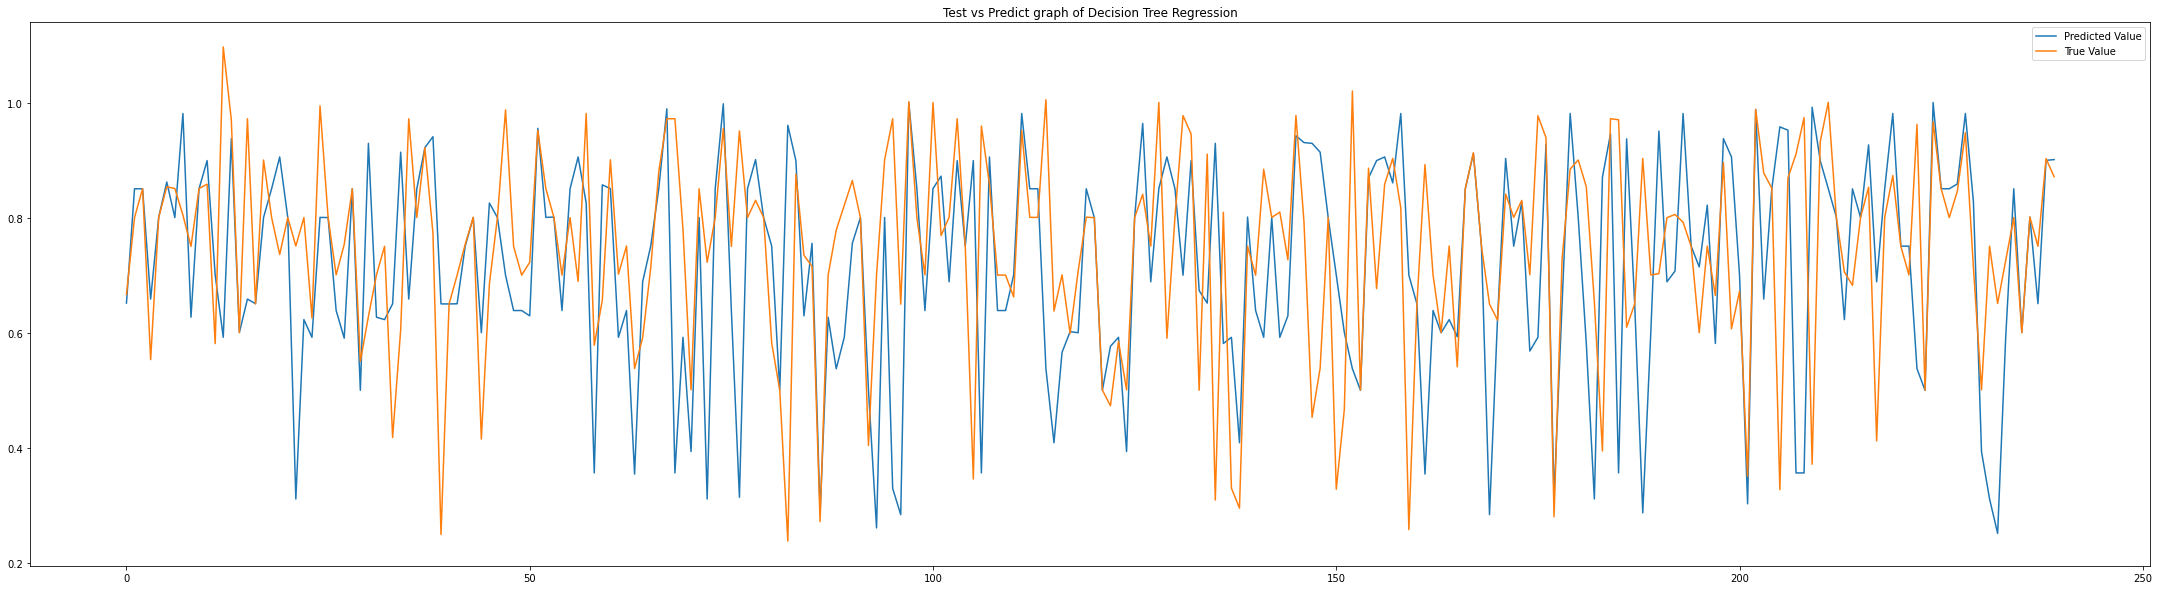

In [749]:
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
graph(pred1, y_test, "Decision Tree Regression")

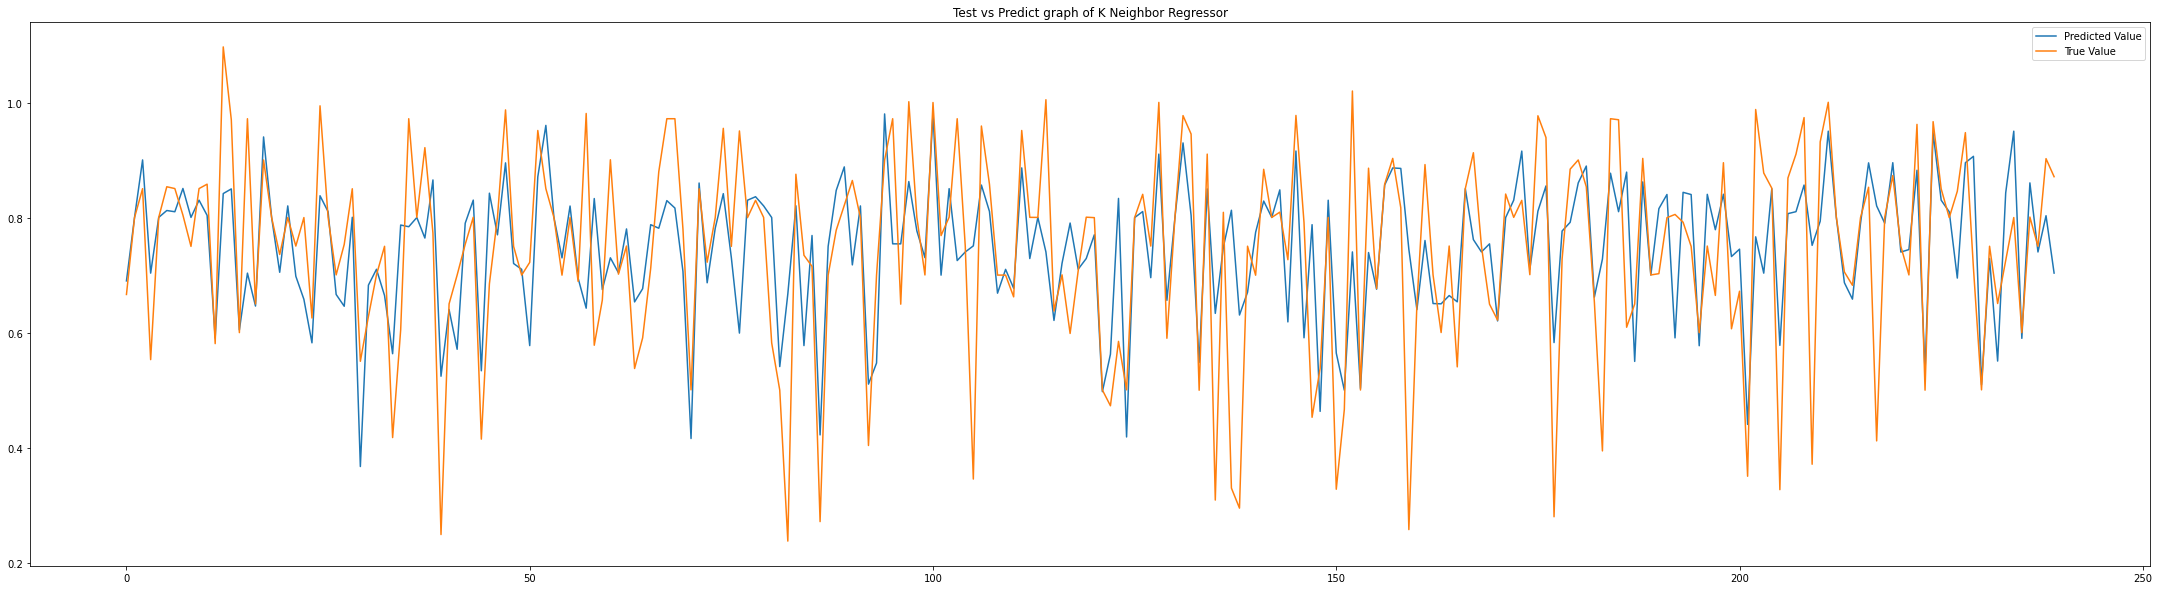

In [750]:
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
graph(pred2, y_test, "K Neighbor Regressor")

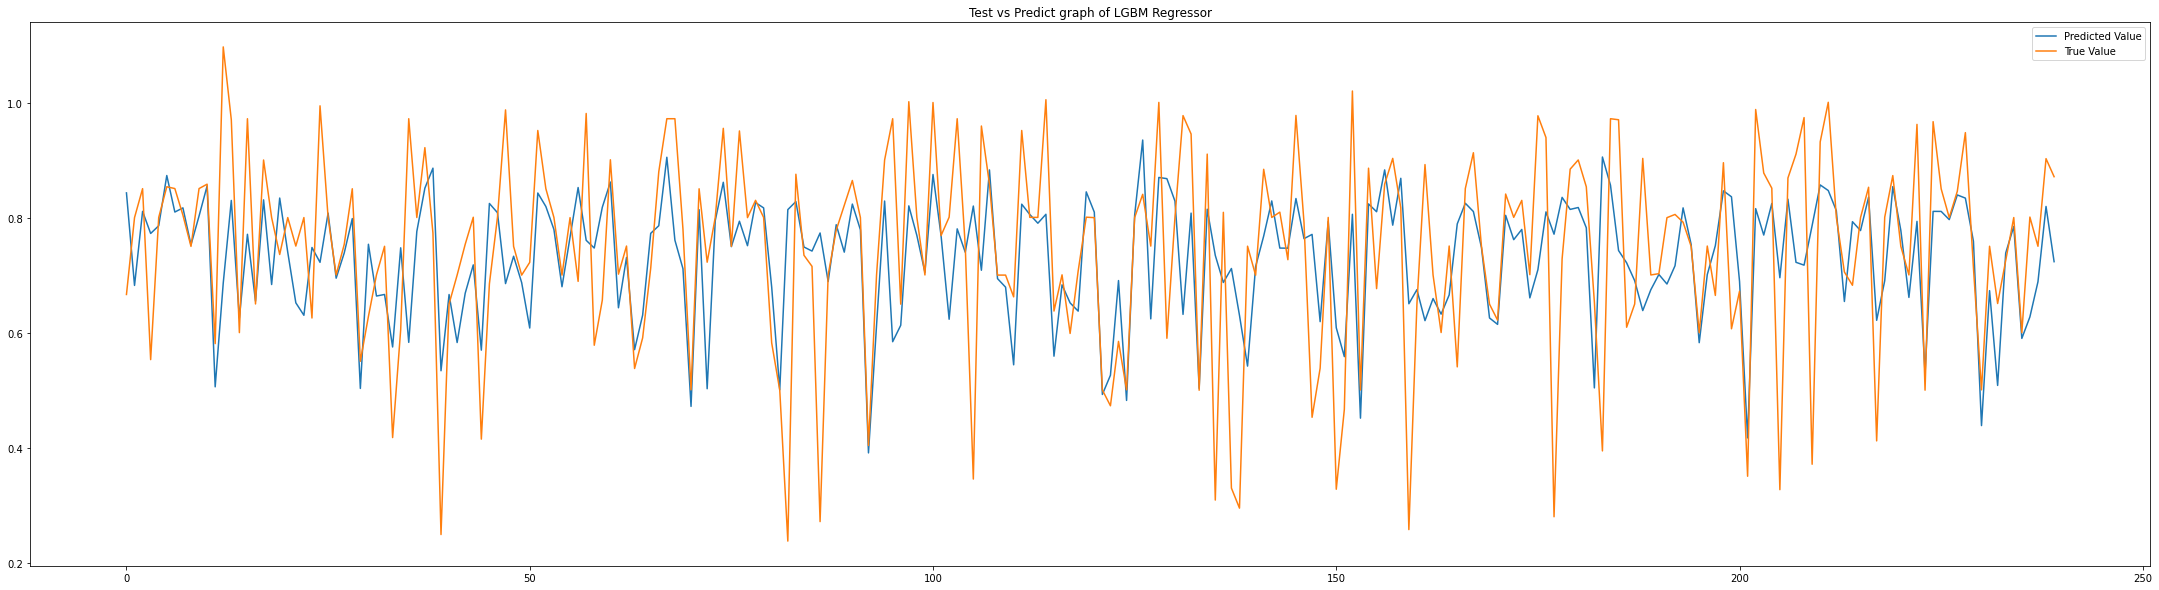

In [751]:
model3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
graph(pred3, y_test, "LGBM Regressor")

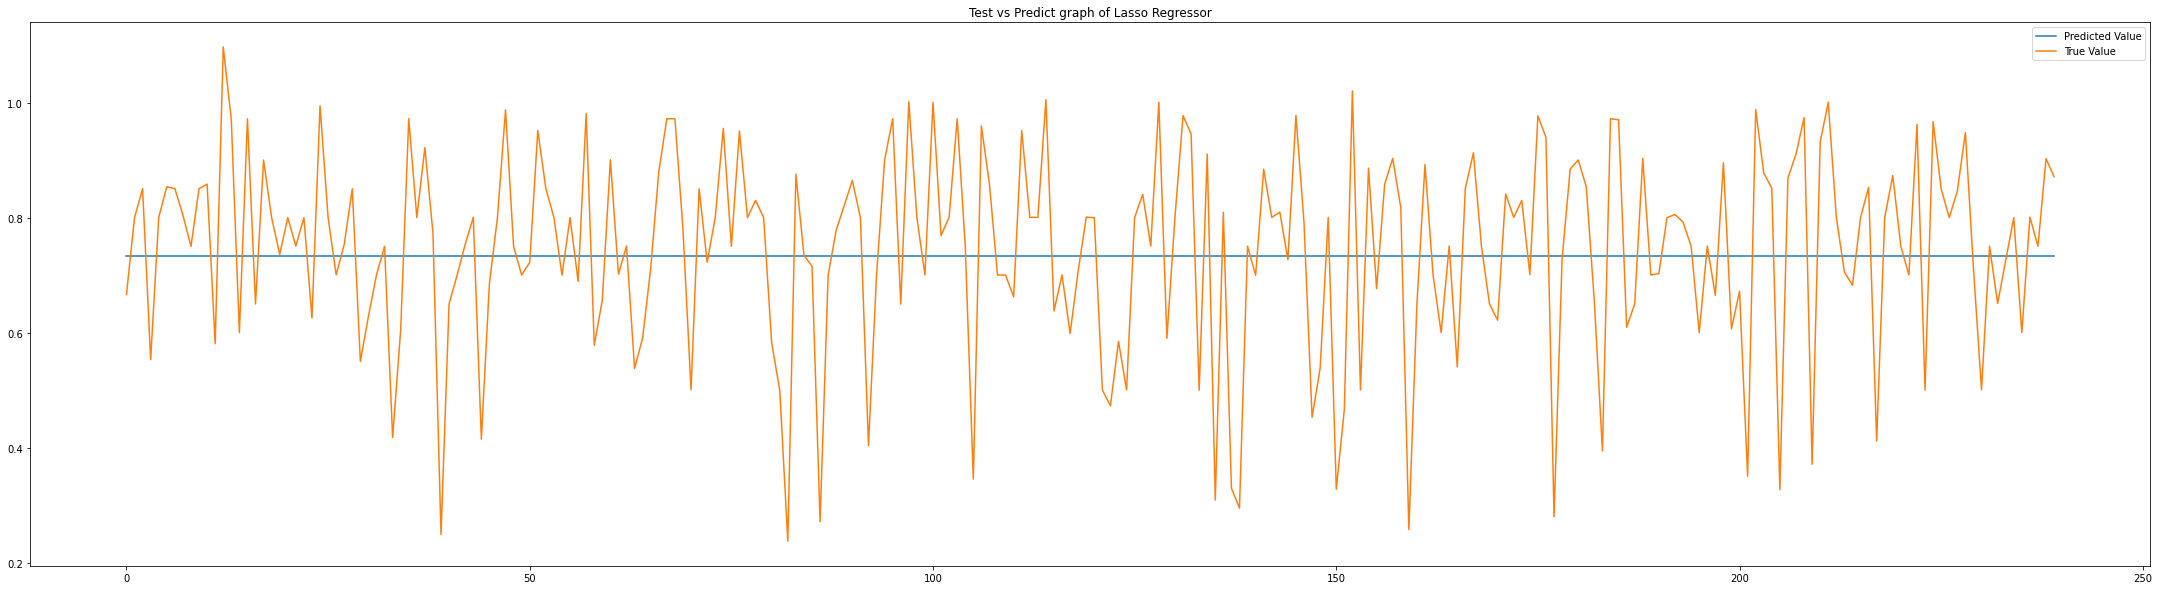

In [752]:
model4.fit(x_train,y_train)
pred4 = model4.predict(x_test)
graph(pred4, y_test, "Lasso Regressor")

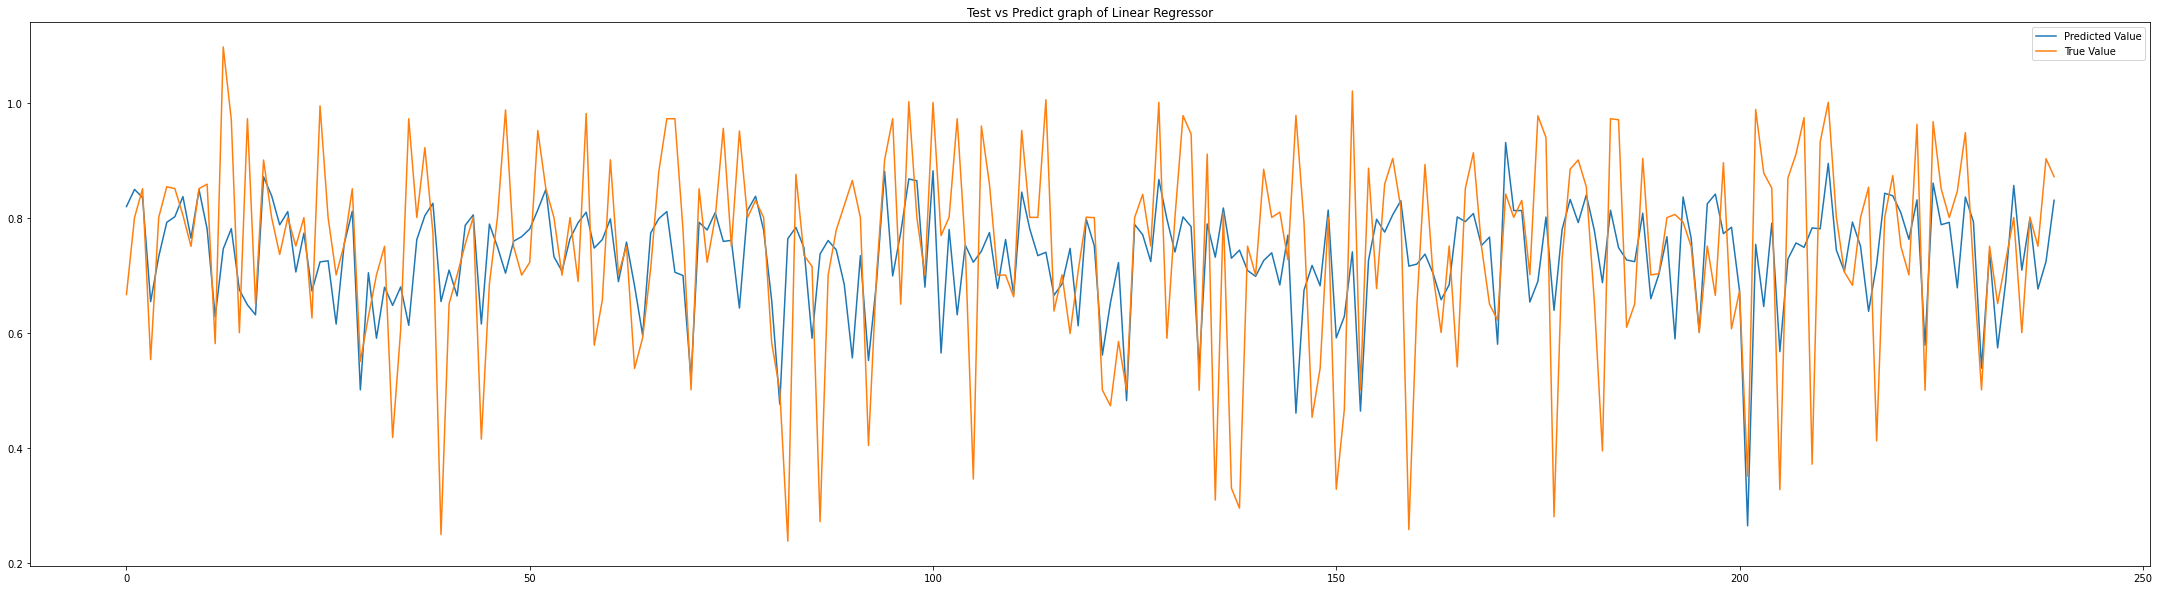

In [753]:
model5.fit(x_train,y_train)
pred5 = model5.predict(x_test)
graph(pred5, y_test, "Linear Regressor")

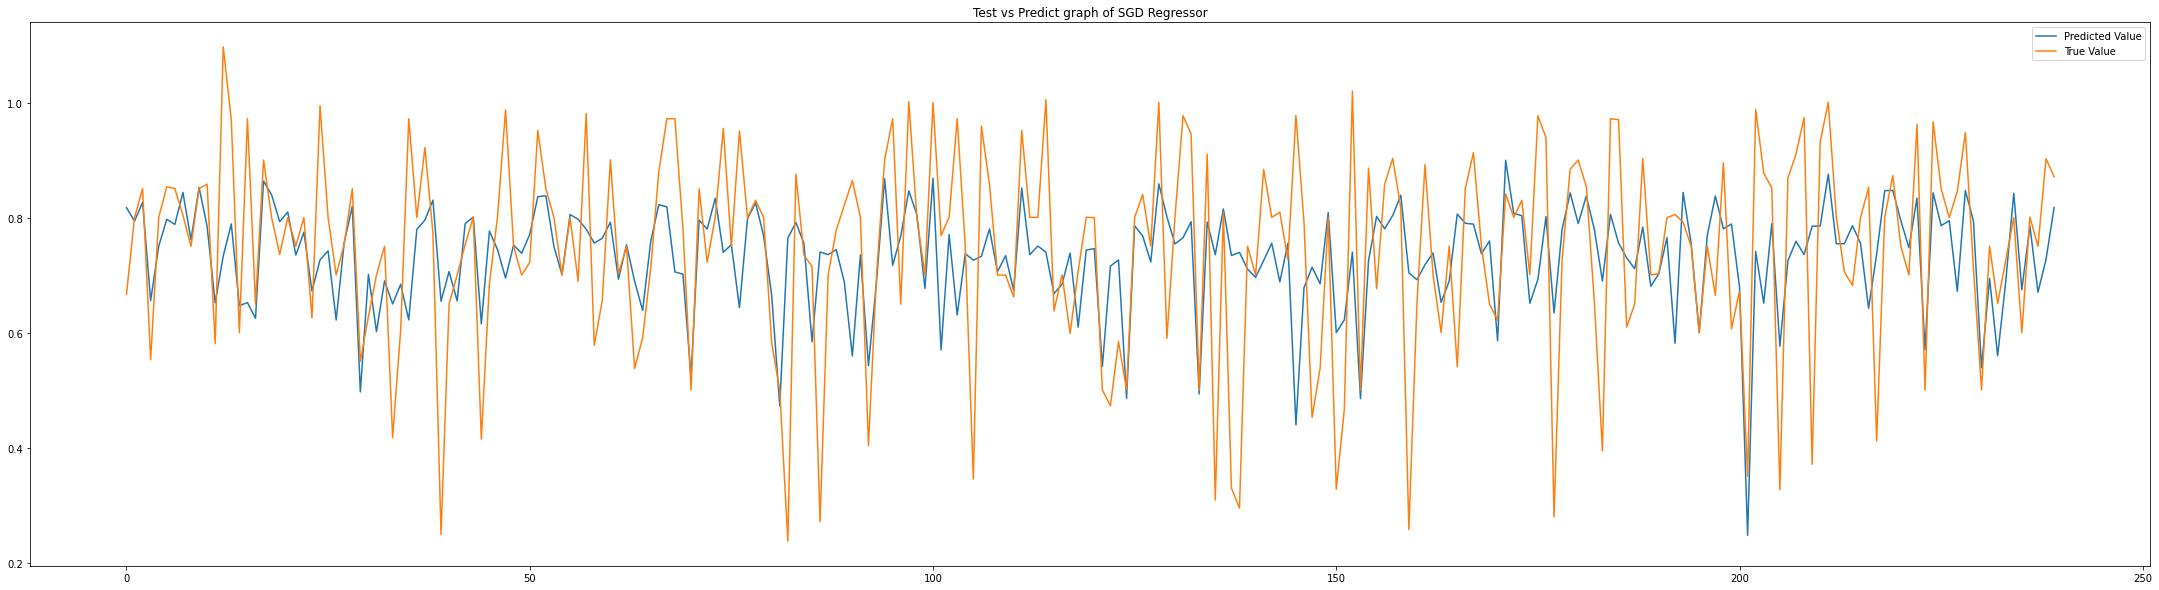

In [754]:
model6.fit(x_train,y_train)
pred6 = model6.predict(x_test)
graph(pred6, y_test, "SGD Regressor")

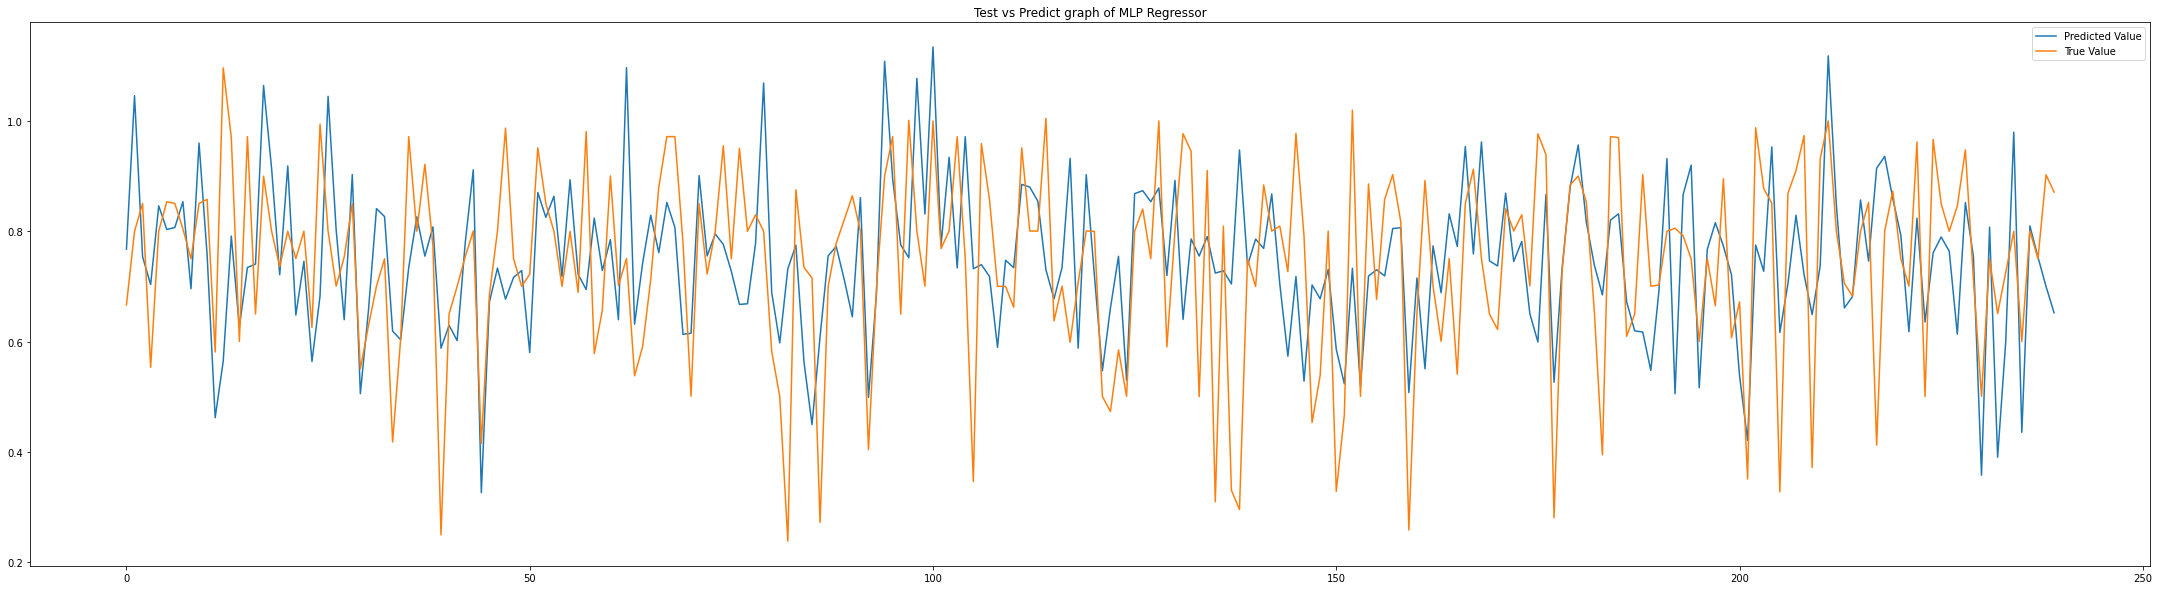

In [755]:
model7.fit(x_train,y_train)
pred7 = model7.predict(x_test)
graph(pred7, y_test, "MLP Regressor")